---

 ## <font color=red>Project:</font>   
---
<center><h1><font color=green>Retail Sales Data Analysis </h1></center>

---

###  <font color=indigo>Dataset Overview:</font>   
---
This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount. These attributes enable a multifaceted exploration of sales trends, demographic influences, and purchasing behaviors.

---
## Questions to explore:

* How does customer age and gender influence their purchasing behavior?
* Are there discernible patterns in sales across different time periods?
* Which product categories hold the highest appeal among customers?
* What are the relationships between age, spending, and product preferences?
* How do customers adapt their shopping habits during seasonal trends?
* Are there distinct purchasing behaviors based on the number of items bought per transaction?
* What insights can be gleaned from the distribution of product prices within each category?

---

# Load Libraries

In [80]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [81]:
#import data
df= pd.read_csv("retail_sales_dataset.csv")

# File Structure and Conent

In [82]:
df.shape

(1000, 9)

In [83]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [84]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [85]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [86]:
#Checking for null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [87]:
# Check for duplicate rows
print(df.duplicated().sum())

0


# 1. How does customer age and gender influence their purchasing behavior?

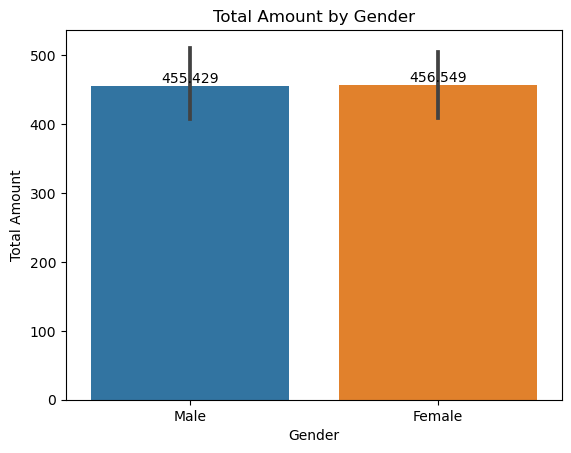

In [92]:
ax=sns.barplot(x='Gender', y='Total Amount', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

### Observation: 
* The total amount spent by Male and Female is approximately same. 
* The spending by female is slightly more.

In [93]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,100],labels=['0-10','11-20','21-30','31-40','41-50','51-60','Above 60'],right=False)

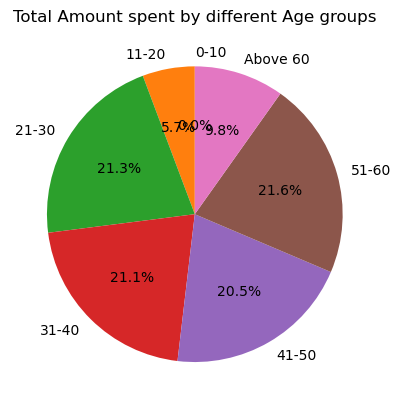

In [94]:
agegroup_totals = df.groupby('AgeGroup')['Total Amount'].sum()

# Create a pie chart
plt.pie(agegroup_totals, labels=agegroup_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Amount spent by different Age groups')
plt.show()


### Observation: 
* The Age Group 21-30 has spent more than other groups, followed by age group 31-40

# 2. Are there discernible patterns in sales across different time periods?

In [95]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [96]:
df['Month'] = df['Date'].dt.month

In [97]:
monthly_sales = df.groupby(df['Date'].dt.month)['Total Amount'].sum()

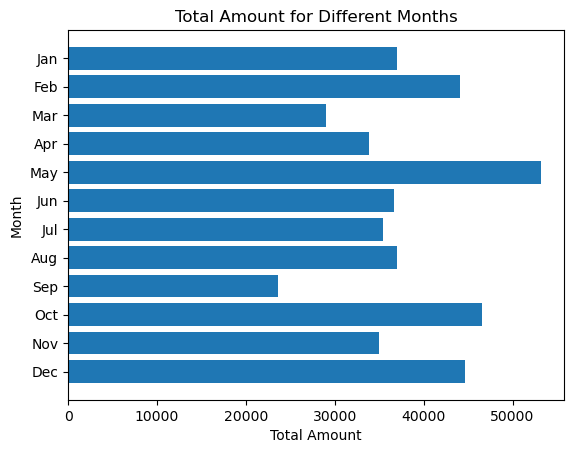

In [98]:
plt.barh(monthly_sales.index, monthly_sales.values[::-1])
plt.title('Total Amount for Different Months')
plt.ylabel('Month')
plt.xlabel('Total Amount')
plt.yticks(monthly_sales.index, ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])
plt.show()

### Observation: 
* The above graph indicates that sales were highest during May month followed by October and then December.

# 3. Which product categories hold the highest appeal among customers?

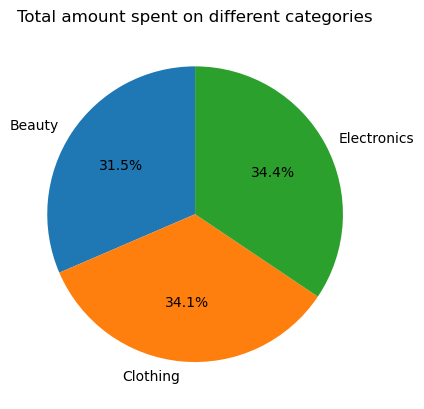

In [99]:
category_totals = df.groupby('Product Category')['Total Amount'].sum()

# Create a pie chart
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total amount spent on different categories')
plt.show()

### Obervation: 
* The graph indicates that Clothing and Electronics products are equally popular among customer. The sales of electronics products is slightly more.

# 4. What are the relationships between age, spending, and product preferences?

In [100]:
beauty_sales = df[df['Product Category'] == 'Beauty']
electronics_sales = df[df['Product Category']=='Electronics']
clothing_sales = df[df['Product Category']=='Clothing']

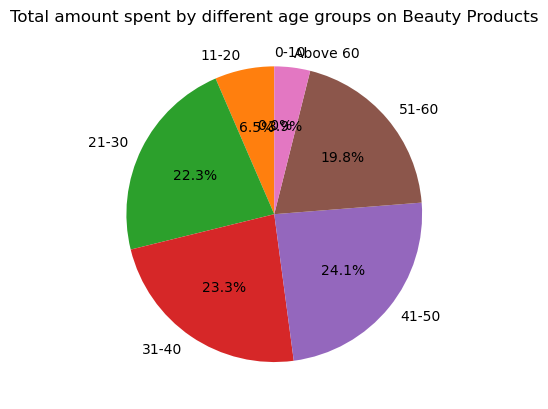

In [101]:
age_totals = beauty_sales.groupby('AgeGroup')['Total Amount'].sum()

# Create a pie chart
plt.pie(age_totals, labels=age_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total amount spent by different age groups on Beauty Products')
plt.show()

### Observation: 
* In beauty product category, age group 41-50 has highest spending share.

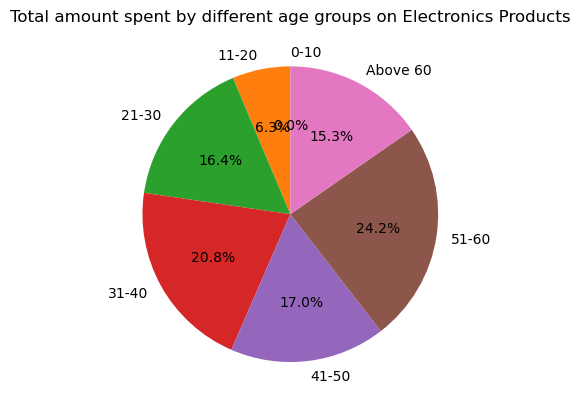

In [102]:
age_totals = electronics_sales.groupby('AgeGroup')['Total Amount'].sum()

# Create a pie chart
plt.pie(age_totals, labels=age_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total amount spent by different age groups on Electronics Products')
plt.show()

### Observation: 
* In electronics product category, age group 51-60 has highest spending share.

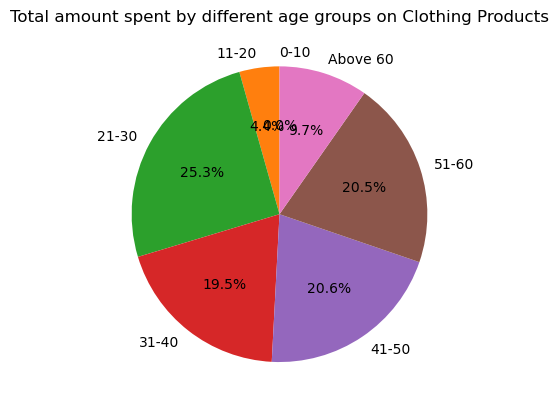

In [103]:
age_totals = clothing_sales.groupby('AgeGroup')['Total Amount'].sum()

# Create a pie chart
plt.pie(age_totals, labels=age_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total amount spent by different age groups on Clothing Products')
plt.show()

### Observation: 
* In Clothing product category, age group 21-30 has highest spending share.

# 5. How do customers adapt their shopping habits during seasonal trends?

In [127]:
df['season'] = df['Month'].map({
    2: 'Summer', 3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Rainy', 7: 'Rainy', 8: 'Rainy', 9: 'Rainy',
    10: 'Winter', 11: 'Winter', 12: 'Winter', 1: 'Winter'
})

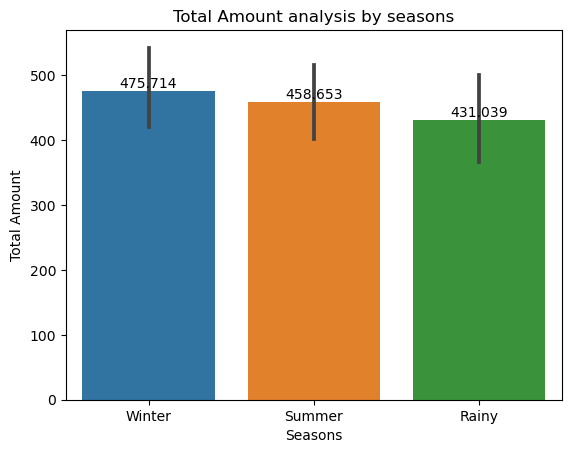

In [105]:
ax=sns.barplot(x='season', y='Total Amount', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Amount analysis by seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Amount')
plt.show()

### Observation: 
* The sales are highest during winter season.

# 6. Are there distinct purchasing behaviors based on the number of items bought per transaction?

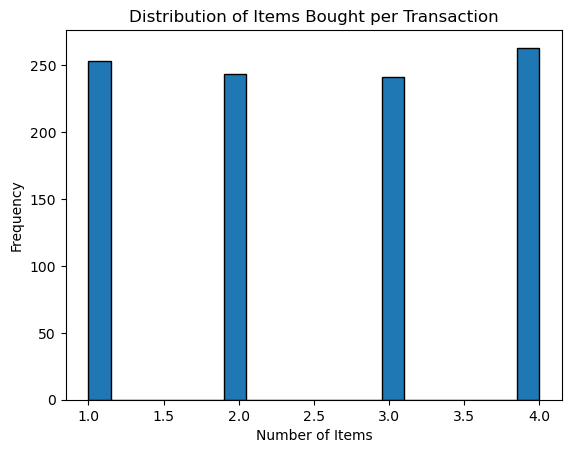

In [106]:
plt.hist(df['Quantity'], bins=20, edgecolor='black')
plt.title('Distribution of Items Bought per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

### Observation: 
* The transactions with 4 no. of items are more.

# 7. What insights can be gleaned from the distribution of product prices within each category?

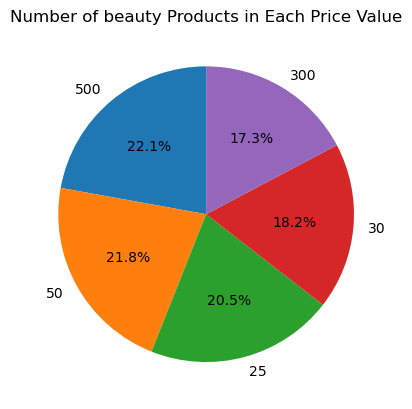

In [117]:
# Aggregate the data based on unique price values and count the number of products
BeautyPrice_counts = beauty_sales['Price per Unit'].value_counts()

# Create a pie chart
plt.pie(BeautyPrice_counts, labels=BeautyPrice_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of beauty Products in Each Price Value')
plt.show()

### Observation:
* Most of the beauty products are with price 500 Rs.

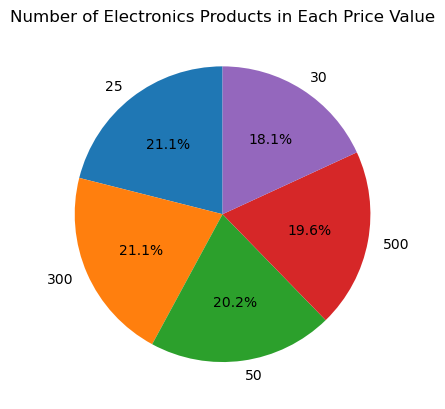

In [126]:
# Aggregate the data based on unique price values and count the number of products
ElectronicsPrice_counts = electronics_sales['Price per Unit'].value_counts()

# Create a pie chart
plt.pie(ElectronicsPrice_counts, labels=ElectronicsPrice_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Electronics Products in Each Price Value')
plt.show()

### Observation:
* Most of the Electronics products are with price Rs. 25 and Rs. 300

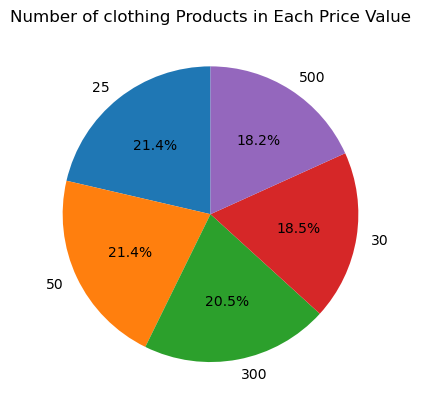

In [125]:
# Aggregate the data based on unique price values and count the number of products
ClothingPrice_counts = clothing_sales['Price per Unit'].value_counts()

# Create a pie chart
plt.pie(ClothingPrice_counts, labels=ClothingPrice_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of clothing Products in Each Price Value')
plt.show()

### Observation:
* Most of the clothing products are with price Rs. 25 and Rs. 50